In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=c27712b85a70de7eb65873bbad5afa663836eab72b149dc16ea44800cd26044b
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


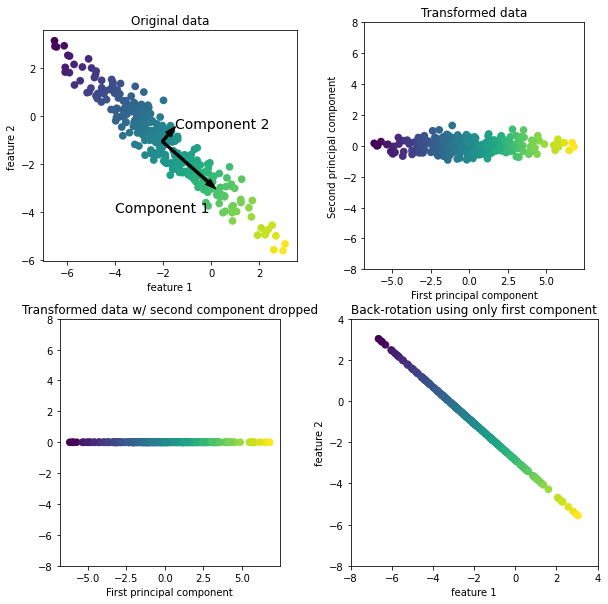

In [ ]:
import mglearn

# Toy dataset
# Example of PCA: 인위적으로 만든 2차원 데이터셋을 사용하여 PCA 효과 나타냄
mglearn.plots.plot_pca_illustration()

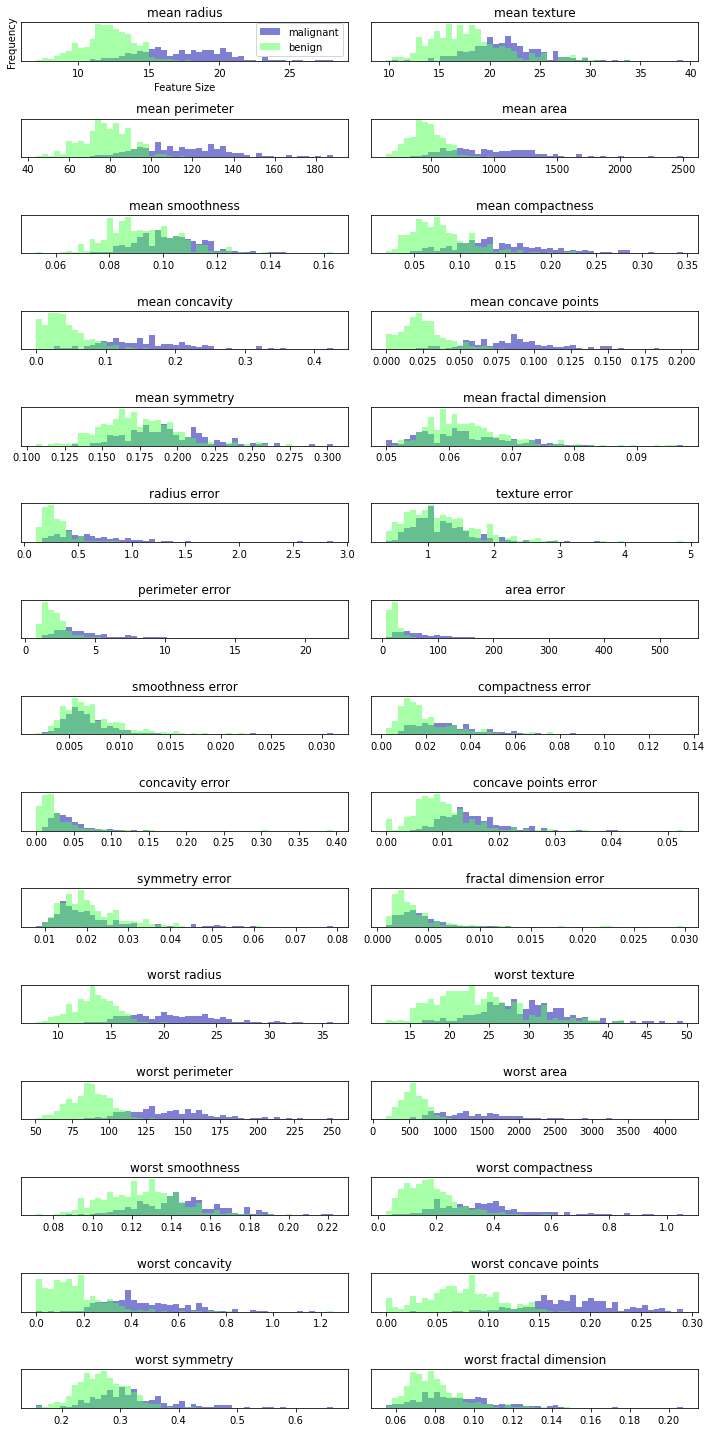

In [ ]:
# Cancer dataset

## 데이터 기본 시각화

import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(15, 2, figsize=(10,20))

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
  # 각 특성에 대한 히스토그램으로 특정 간격(bin이라고 부름)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것
  _, bins = np.histogram(cancer.data[:,i], bins=50)
  ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

ax[0].set_xlabel("Feature Size")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [ ]:
## PCA 시각화

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 데이터의 처음 두 개 주성분만 유지
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) # 데이터 변환

print('original: ', str(X_scaled.shape))
print('scaled: ', str(X_pca.shape))

original:  (569, 30)
scaled:  (569, 2)


Text(0, 0.5, 'PCA2')

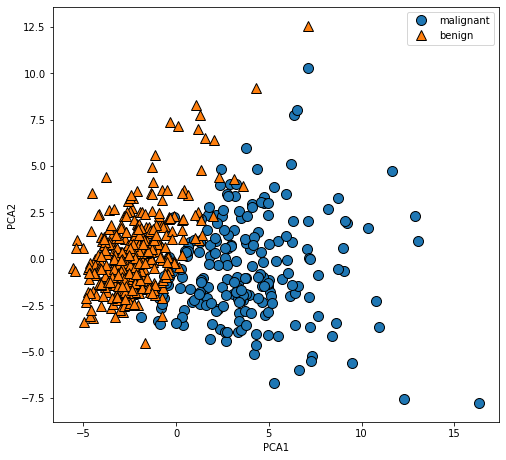

In [ ]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(['malignant', 'benign'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA')

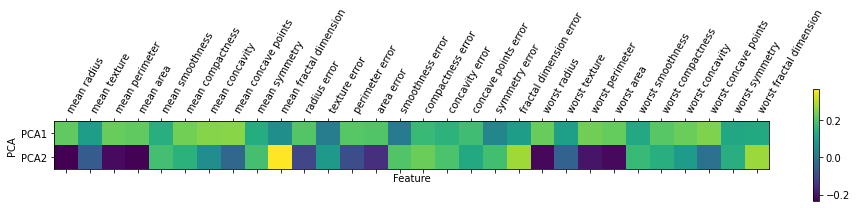

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['PCA1','PCA2'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('PCA')

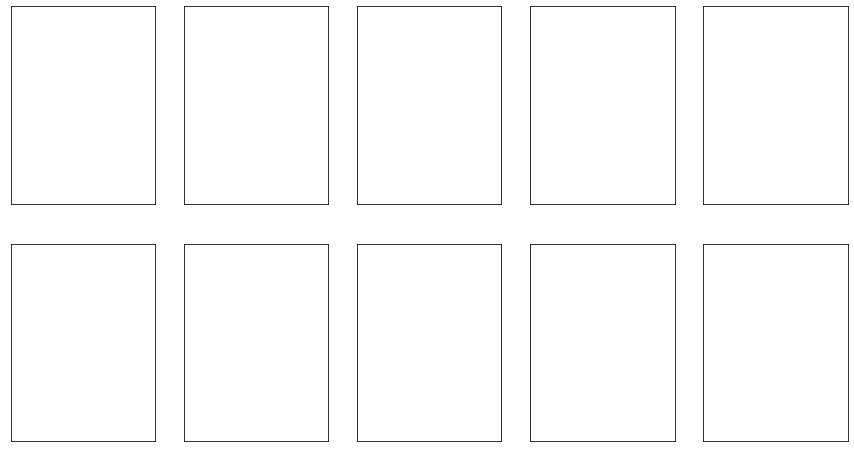

In [ ]:
# LFW dataset

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

people.images.shape:  (3023, 87, 65)
number of class:  62


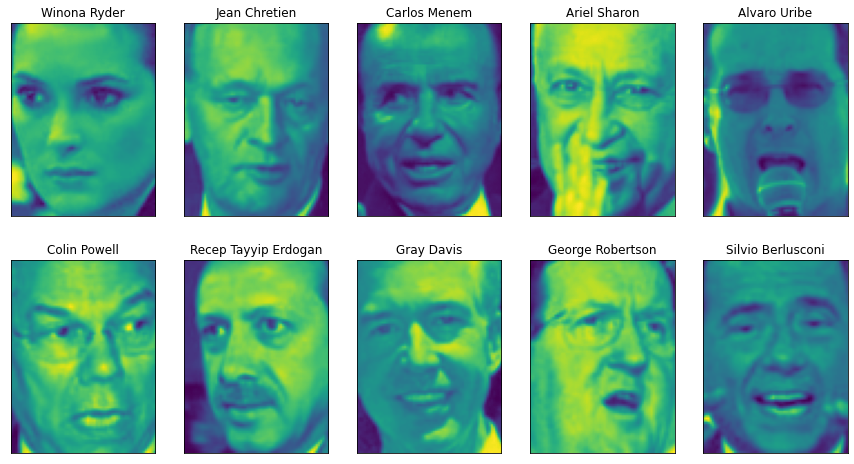

In [ ]:
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

print('people.images.shape: ', people.images.shape)
print('number of class: ', len(people.target_names))

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
print('people.DESCR', people.DESCR)

people.DESCR .. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented

In [ ]:
# 각 타깃이 나타난 횟수
counts = np.bincount(people.target)

# 타깃별 이름과 횟수 출력
for i, (count,name) in enumerate(zip(counts, people.target_names)):
  print('{0:25} {1:3}'.format(name,count), end='    ')
  if (i+1) % 3 == 0:
    print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [ ]:
# 총 3023개의 이미지를 쉽게 다루기 위한 mask 변수를 모두 False로 초기화
mask = np.zeros(people.target.shape, dtype=np.bool)
print('mask:', mask)
print('mask.shape:', mask.shape)

mask: [False False False ... False False False]
mask.shape: (3023,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# 3023개의 각 이미지의 라벨(클래스, e.g. 62명이 얼굴이라면 0~61 사이의 숫자)을 출력 후 확인
print(people.target)
print(people.target.shape)

[61 25  9 ... 14 15 14]
(3023,)


In [ ]:
# 총 3023개의 이미지에서 중복되는 경우를 제외하고 62명의 얼굴만 추려냄
for target in np.unique(people.target):
  # 데이터 편중을 없애기 위해 사람마다 50개의 이미지만 선택
  mask[np.where(people.target==target)[0][:50]] = 1
print('mask: ', mask)

mask:  [ True  True  True ... False False False]


In [ ]:
X_people = people.data[mask]
print('X_people: ', X_people)
print('X_people.shape: ', X_people.shape)

X_people:  [[ 57.         60.333332   78.        ...  17.333334   16.666666
   22.666666 ]
 [ 66.666664   80.666664   88.666664  ...   8.666667    8.333333
    9.333333 ]
 [ 18.666666   14.333333   15.        ...  22.666666   22.666666
   25.666666 ]
 ...
 [ 36.333332   22.333334   28.        ...  14.333333    6.6666665
    5.3333335]
 [ 54.         65.333336   56.333332  ... 209.66667   210.
  212.33333  ]
 [110.666664  128.33333   145.33333   ...  14.         14.
   13.666667 ]]
X_people.shape:  (2063, 5655)


In [ ]:
y_people = people.target[mask]
print('y_people: ', y_people)
print('y_people.shape: ', y_people.shape)

y_people:  [61 25  9 ...  9 37 22]
y_people.shape:  (2063,)


In [ ]:
# 0~255 사이이 흑백 이미지의 픽셀 값을 0-1 스케일로 조정
X_people = X_people/255
print('X_people/255: ', X_people)
print('X_people/255/shape: ', X_people.shape)

X_people/255:  [[0.22352941 0.23660131 0.30588236 ... 0.06797386 0.06535947 0.08888888]
 [0.2614379  0.31633985 0.3477124  ... 0.03398693 0.03267974 0.03660131]
 [0.07320261 0.05620915 0.05882353 ... 0.08888888 0.08888888 0.10065359]
 ...
 [0.14248365 0.0875817  0.10980392 ... 0.05620915 0.02614379 0.02091503]
 [0.21176471 0.25620916 0.22091503 ... 0.82222223 0.8235294  0.8326797 ]
 [0.43398693 0.50326794 0.5699346  ... 0.05490196 0.05490196 0.05359477]]
X_people/255/shape:  (2063, 5655)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('1-최근접 이웃의 테스트 세트 점수: {:.2f}'.format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


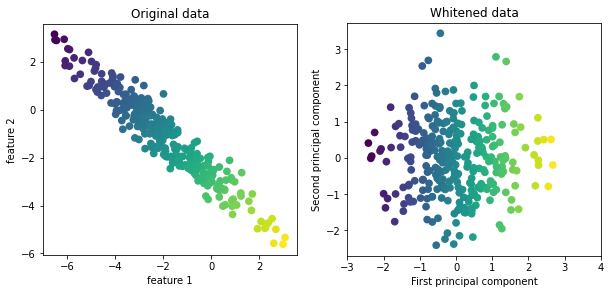

In [ ]:
mglearn.plots.plot_pca_whitening()

In [ ]:
# PCA 객체를 훈련 데이터로 학습시켜서 처음 100개의 주성분을 추출
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

# 주성분으로 반환된 훈련 데이터와 데이트 데이터를 반환
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape: ', X_train_pca.shape)

X_train_pca.shape:  (1547, 100)


In [ ]:
# 새 데이터는 처음 100개의 주성분에 해당되는 특성을 가지고 있기에 해당 데이터를 활용하여 kNN으로 이미지를 분류
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('테스트 세트 정확도: {:.2f}'.format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


In [ ]:
# 몇 개의 주성분을 시각화
print('pca.components_.shape', pca.components_.shape)

pca.components_.shape (100, 5655)


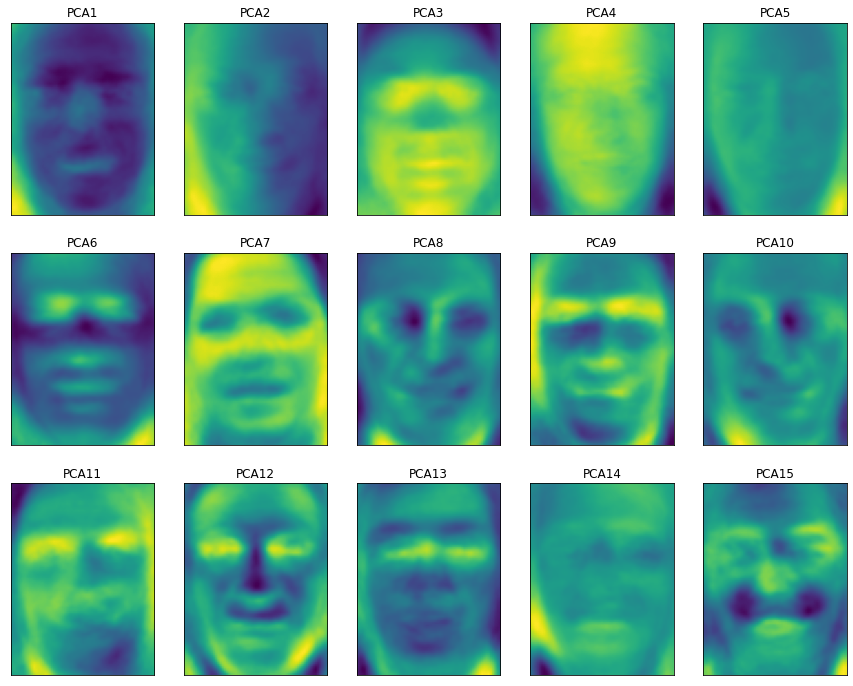

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image.shape), cmap='viridis')
  ax.set_title('PCA{}'.format((i+1)))

In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드 된 파일 정보 출력
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving PCA.jpg to PCA.jpg
User uploaded file "PCA.jpg" with length 60389 bytes


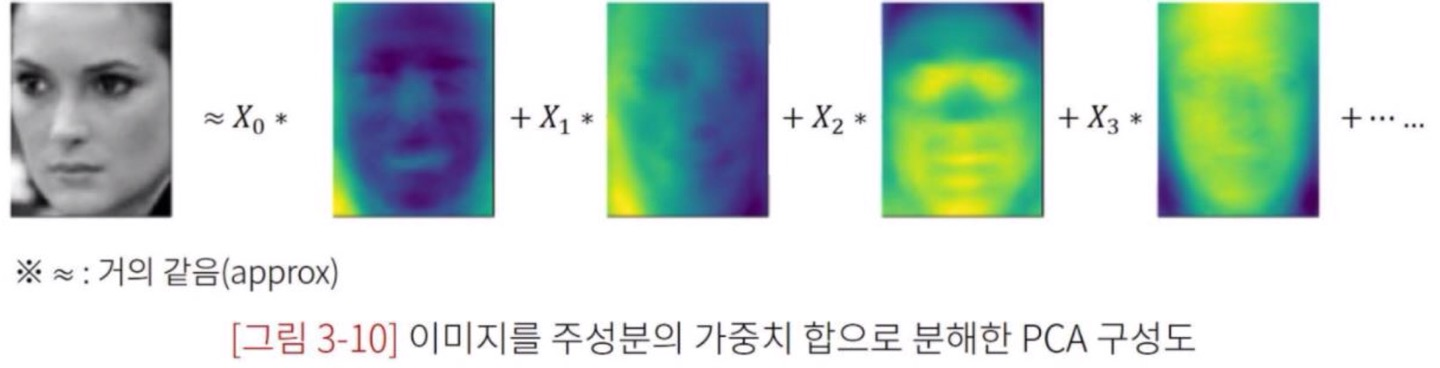

In [ ]:
from IPython.display import Image
Image('PCA.jpg')

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
_______________________________________________________pca_faces - 10.0s, 0.2min


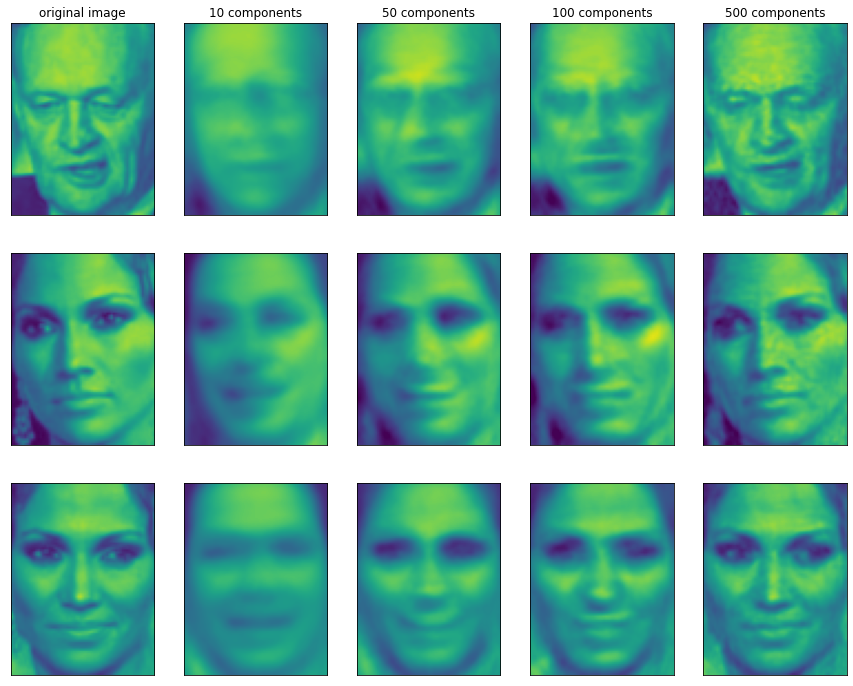

In [ ]:
mglearn.plots.plot_pca_faces(X_train, X_test, image.shape)

Text(0, 0.5, 'PCA2')

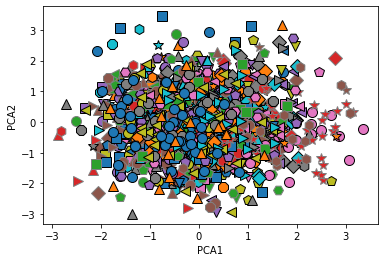

In [ ]:
# PCA의 2개 주성분만을 이용해서 전체 데이터를 누구의 얼굴인지 클래스로 구분해서 산점도에 표현
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel('PCA1')
plt.ylabel('PCA2')